In [59]:
import pandas as pd
import numpy as np 
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('drug200.csv')

In [61]:
df.shape

(200, 6)

In [62]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [63]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [64]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [65]:
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [66]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [67]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [68]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [71]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [72]:
drugTree = DecisionTreeClassifier(criterion = 'gini', max_depth=10)

In [73]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=10)

In [74]:
predTree = drugTree.predict(X_testset)

In [75]:
metrics.accuracy_score(y_testset,predTree)

0.9833333333333333

[Text(0.625, 0.9, 'x[4] <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.625, 0.3, 'x[2] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

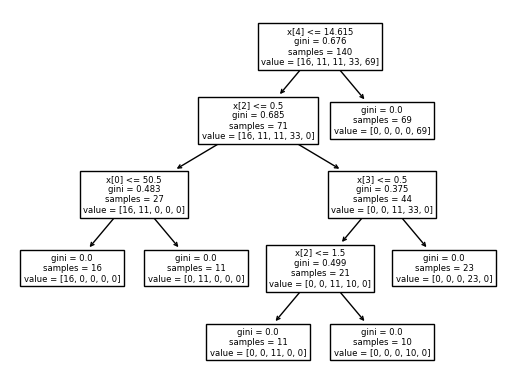

In [76]:
tree.plot_tree(drugTree)

In [77]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
dt_classifier=DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 30),  # Random integer between 1 and 10 for max_depth
    'min_samples_split': randint(2, 10),  # Random integer between 2 and 10 for min_samples_split
    'min_samples_leaf': randint(1, 10),   # Random integer between 1 and 10 for min_samples_leaf
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_classifier,  # Decision Tree Classifier
    param_distributions=param_dist,  # Parameter grid for tuning
    n_iter=10,  # Number of random parameter settings to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    random_state=42  # Set a random seed for reproducibility
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)
best_dt_model = random_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 6, 'splitter': 'best'}


In [78]:
drugTree = DecisionTreeClassifier(criterion = 'gini', max_depth=20, min_samples_leaf=8, min_samples_split=6, splitter = 'best')

In [79]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=8, min_samples_split=6)

In [80]:
predTree = drugTree.predict(X_testset)

In [81]:
metrics.accuracy_score(y_testset,predTree)

0.9833333333333333

[Text(0.625, 0.9, 'x[4] <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.625, 0.3, 'x[2] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

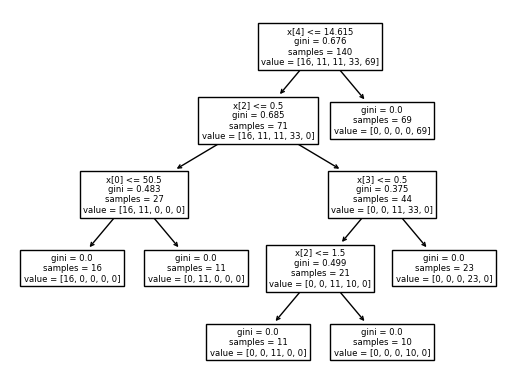

In [82]:
tree.plot_tree(drugTree)

In [25]:
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 31),  # Grid search over max_depth from 1 to 30
    'min_samples_split': range(2, 11),  # Grid search over min_samples_split from 2 to 10
    'min_samples_leaf': range(1, 11)  # Grid search over min_samples_leaf from 1 to 10
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    dt_classifier,  # Decision Tree Classifier
    param_grid=param_grid,  # Parameter grid for tuning
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [83]:
drugTree = DecisionTreeClassifier(criterion = 'gini', max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter = 'best')

In [84]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=4)

In [85]:
predTree = drugTree.predict(X_testset)

[Text(0.625, 0.9, 'x[4] <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.625, 0.3, 'x[2] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

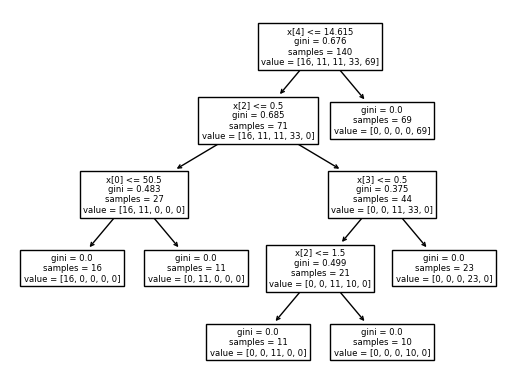

In [86]:
tree.plot_tree(drugTree)

In [87]:
metrics.accuracy_score(y_testset,predTree)

0.9833333333333333

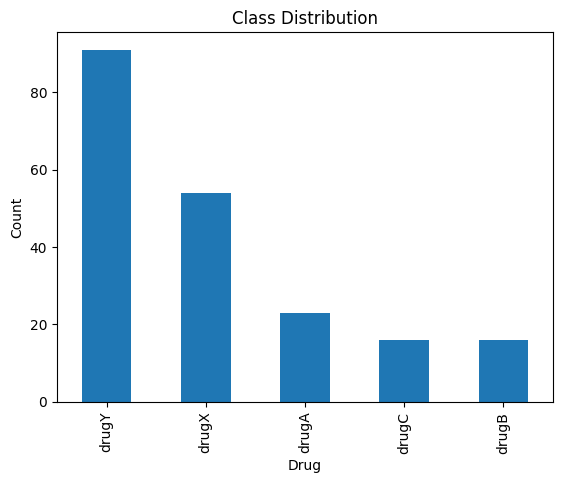

Class Counts:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Imbalance Ratio: 0.17582417582417584


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Features
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

# Class labels
y = df['Drug']

# Method 1: Class Distribution Visualization
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

# Method 2: Class Counts
class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)

# Method 4: Class Imbalance Ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print("Imbalance Ratio:", imbalance_ratio)


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
#data = pd.read_csv("your_dataset.csv")

# Features (excluding 'Drug' column)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

# Target variable
y = df['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

# Define which features are categorical
categorical_features = ['Sex', 'BP', 'Cholesterol']

# Create a ColumnTransformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessing steps
X_train_encoded = preprocessor.fit_transform(X_train_df)
X_test_encoded = preprocessor.transform(X_test)

# Now, continue with the rest of your code (applying SMOTE, calculating class weights, training the classifier, etc.)


In [90]:
X_encoded = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [91]:
df.shape

(200, 6)

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load the dataset
#data = pd.read_csv("your_dataset.csv")

# Separate features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Encode categorical variables using one-hot encoding if needed
X_encoded = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y_train))

# Apply random undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_train_resampled))

# Now you can continue with the rest of your code (calculating class weights, training the classifier, etc.)


Class distribution before undersampling: Counter({'drugY': 76, 'drugX': 43, 'drugA': 17, 'drugB': 13, 'drugC': 11})
Class distribution after undersampling: Counter({'drugA': 11, 'drugB': 11, 'drugC': 11, 'drugX': 11, 'drugY': 11})


In [93]:
drugTree = DecisionTreeClassifier(criterion = 'gini', max_depth=20, min_samples_leaf=8, min_samples_split=6, splitter = 'best')

In [94]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=8, min_samples_split=6)

In [95]:
predTree = drugTree.predict(X_test)

[Text(0.75, 0.9, 'x[1] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.625, 0.7, 'x[4] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.5, 0.5, 'x[3] <= 0.5\ngini = 0.743\nsamples = 53\nvalue = [17, 13, 11, 12, 0]'),
 Text(0.25, 0.3, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.3, 'x[5] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

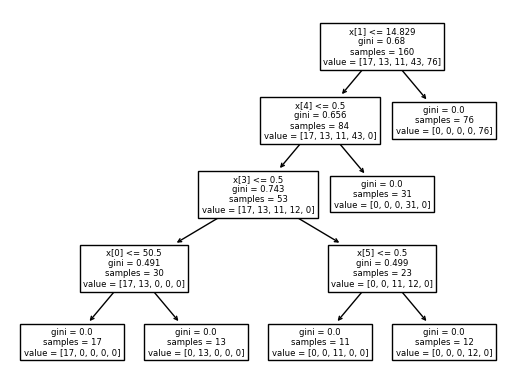

In [96]:
tree.plot_tree(drugTree)

In [113]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are the true labels and predicted labels respectively
print("Classification Report:")
print(classification_report(y_test, predTree))


Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
#data = pd.read_csv("your_dataset.csv")

# Separate features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Encode categorical variables using one-hot encoding if needed
X_encoded = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Now you can continue with the rest of your code (calculating class weights, training the classifier, etc.)


Class distribution before SMOTE: Counter({'drugY': 76, 'drugX': 43, 'drugA': 17, 'drugB': 13, 'drugC': 11})
Class distribution after SMOTE: Counter({'drugX': 76, 'drugY': 76, 'drugC': 76, 'drugA': 76, 'drugB': 76})


In [98]:
drugTree = DecisionTreeClassifier(criterion = 'gini', max_depth=20, min_samples_leaf=8, min_samples_split=6, splitter = 'best')

In [99]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=8, min_samples_split=6)

In [100]:
predTree = drugTree.predict(X_test)

[Text(0.75, 0.9, 'x[1] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.625, 0.7, 'x[4] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.5, 0.5, 'x[3] <= 0.5\ngini = 0.743\nsamples = 53\nvalue = [17, 13, 11, 12, 0]'),
 Text(0.25, 0.3, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.3, 'x[5] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

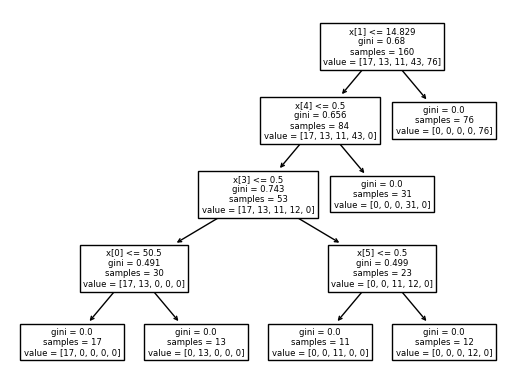

In [101]:
tree.plot_tree(drugTree)

In [112]:
metrics.accuracy_score(y_test,predTree)

1.0

In [111]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are the true labels and predicted labels respectively
print("Classification Report:")
print(classification_report(y_test, predTree))


Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

